In [251]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest,SelectPercentile
from sklearn.metrics import accuracy_score

# Importing Dataset

In [252]:
dataset=pd.read_csv("term-deposit-marketing-2020.csv")
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [253]:
data=dataset[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration',
             'campaign']].copy()
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1


In [254]:
job={'management':0,'technician':1, 'entrepreneur':2, 'blue-collar':3,
       'unknown':4, 'retired':5, 'admin':6, 'services':7, 'self-employed':8,
       'unemployed':9, 'housemaid':10, 'student':11}
data['job']=data['job'].map(job)

In [255]:
marital={'married':0,'single':1,'divorced':2}
data['marital']=data['marital'].map(marital)

In [256]:
education={'tertiary':0, 'secondary':1, 'unknown':2, 'primary':3}
data['education']=data['education'].map(education)

In [257]:
default={'no':0,'yes':1}
data['default']=data['default'].map(default)

In [258]:
housing={'no':0,'yes':1}
data['housing']=data['housing'].map(housing)

In [259]:
loan={'no':0,'yes':1}
data['loan']=data['loan'].map(loan)

In [260]:
contact={'unknown':0, 'cellular':1, 'telephone':2}
data['contact']=data['contact'].map(contact)

In [261]:
month={'may':0, 'jun':1, 'jul':2, 'aug':3, 'oct':4, 'nov':5, 'dec':6, 'jan':7, 'feb':8,
       'mar':9, 'apr':10}
data['month']=data['month'].map(month)

In [262]:
y={'no':0,'yes':1}
dataset['y']=dataset['y'].map(y)

In [263]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,58,0,0,0,0,2143,1,0,0,5,0,261,1
1,44,1,1,1,0,29,1,0,0,5,0,151,1
2,33,2,0,1,0,2,1,1,0,5,0,76,1
3,47,3,0,2,0,1506,1,0,0,5,0,92,1
4,33,4,1,2,0,1,0,0,0,5,0,198,1


# Do F-Test

In [264]:
x=data.copy()
y=dataset['y']

In [265]:
x.shape, y.shape

((40000, 13), (40000,))

In [266]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

In [267]:
f_score=f_classif(x_train,y_train)
f_score

(array([1.23500835e+01, 2.21732976e+00, 7.02062110e+01, 5.47263731e+01,
        4.85369510e-01, 3.63862272e+01, 8.83351730e+01, 3.48838070e+01,
        1.77362058e+02, 1.03375527e+00, 3.67257898e+02, 8.53924495e+03,
        4.50427720e+01]),
 array([4.41575557e-04, 1.36478766e-01, 5.55725624e-17, 1.41931072e-13,
        4.86005224e-01, 1.63616257e-09, 5.87994886e-21, 3.53510672e-09,
        2.33860259e-40, 3.09285978e-01, 2.11789439e-81, 0.00000000e+00,
        1.95991226e-11]))

In [268]:
p_values=pd.Series(f_score[1],index=x_train.columns)
p_values.sort_values(ascending=True,inplace=True)

In [269]:
p_values

duration     0.000000e+00
month        2.117894e-81
contact      2.338603e-40
housing      5.879949e-21
marital      5.557256e-17
education    1.419311e-13
campaign     1.959912e-11
balance      1.636163e-09
loan         3.535107e-09
age          4.415756e-04
job          1.364788e-01
day          3.092860e-01
default      4.860052e-01
dtype: float64

<AxesSubplot:>

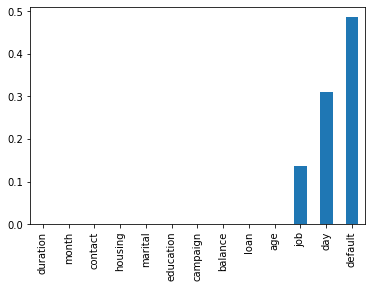

In [270]:
p_values.plot.bar()

In [271]:
x_train_2=x_train[['duration','month','contact']]
x_test_2=x_test[['duration','month','contact']]

In [272]:
from sklearn.ensemble import RandomForestClassifier
def run_randomForest(x_train,x_test,y_train,y_test):
    clf= RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print("Accuracy: {}".format(accuracy_score(y_test,y_pred)))

In [273]:
%%time
run_randomForest(x_train,x_test,y_train,y_test)

Accuracy: 0.939125
Wall time: 1.67 s


In [274]:
%%time
run_randomForest(x_train_2,x_test_2,y_train,y_test)

Accuracy: 0.923875
Wall time: 1.34 s


As it can be seen, 'Duration','Month','Contact' features accuracy scores(0.923) 
are almost near all features accuracy scores(0.939). These features should be focused more on.